### Problem Statement:

#### Our clients want to launch a new product and want to understand the reviews of the competitors to see what are the challenges faced by consumers. Hence want to improve the respective features to address the challenges. Thus  the newly launched product should have enhanced features.

### Importing the libraries:

In [166]:
import numpy as np
import pandas as pd
import string
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
from collections import Counter
from textblob import TextBlob
from plotly import graph_objs as go
import plotly.express as px
import text2emotion as te
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()

### Importing the Dataset:

In [246]:
inalsa_data = pd.read_excel("inalsa_data.xlsx")
stok_data = pd.read_excel("stok_data.xlsx")
philips_data = pd.read_excel("philips_data.xlsx")

raw_data = pd.concat([inalsa_data, stok_data, philips_data])
raw_data

Unnamed: 0             Name  \
0              0      SonamGupta    
1              1     Sumit Saxena   
2              2     Ankit Mishra   
3              3     Tushar Arora   
4              4  Amazon Customer   
...          ...              ...   
1841        1841      Mitu Biswas   
1842        1842           Prince   
1843        1843           kishor   
1844        1844            B S R   
1845        1845         Manmohan   

                                           Review_Title              Rating  \
0                       MUST BUY ..... INALASA AIRFRYER  5.0 out of 5 stars   
1                Low Quality/ Pathetic Customer Support  1.0 out of 5 stars   
2                                           Easy to use  5.0 out of 5 stars   
3                            Was almost a great product  2.0 out of 5 stars   
4                     Product has manufacturing defect.  1.0 out of 5 stars   
...                                                 ...                 ...   
1841                                         Five Stars  5.0 out of 5 stars   
1842  Cooks with less oil but carries another health...  3.0 out of 5 stars   
1843  Phillips product waste of money,poor product d...  1.0 out of 5 stars   
1844                                 Philip’s Air Fryer  4.0 out of 5 stars   
1845                                       Good product  5.0 out of 5 stars   

                                        Date  \
0          Reviewed in India on 1 March 2019   
1     Reviewed in India on 29 September 2019   
2      Reviewed in India on 22 February 2019   
3          Reviewed in India on 23 July 2019   
4          Reviewed in India on 4 April 2019   
...                                      ...   
1841   Reviewed in India on 11 November 2014   
1842         Reviewed in India on 7 May 2015   
1843      Reviewed in India on 21 March 2021   
1844       Reviewed in India on 1 March 2021   
1845      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 6 columns]

In [247]:
data = raw_data.copy()

data

Unnamed: 0             Name  \
0              0      SonamGupta    
1              1     Sumit Saxena   
2              2     Ankit Mishra   
3              3     Tushar Arora   
4              4  Amazon Customer   
...          ...              ...   
1841        1841      Mitu Biswas   
1842        1842           Prince   
1843        1843           kishor   
1844        1844            B S R   
1845        1845         Manmohan   

                                           Review_Title              Rating  \
0                       MUST BUY ..... INALASA AIRFRYER  5.0 out of 5 stars   
1                Low Quality/ Pathetic Customer Support  1.0 out of 5 stars   
2                                           Easy to use  5.0 out of 5 stars   
3                            Was almost a great product  2.0 out of 5 stars   
4                     Product has manufacturing defect.  1.0 out of 5 stars   
...                                                 ...                 ...   
1841                                         Five Stars  5.0 out of 5 stars   
1842  Cooks with less oil but carries another health...  3.0 out of 5 stars   
1843  Phillips product waste of money,poor product d...  1.0 out of 5 stars   
1844                                 Philip’s Air Fryer  4.0 out of 5 stars   
1845                                       Good product  5.0 out of 5 stars   

                                        Date  \
0          Reviewed in India on 1 March 2019   
1     Reviewed in India on 29 September 2019   
2      Reviewed in India on 22 February 2019   
3          Reviewed in India on 23 July 2019   
4          Reviewed in India on 4 April 2019   
...                                      ...   
1841   Reviewed in India on 11 November 2014   
1842         Reviewed in India on 7 May 2015   
1843      Reviewed in India on 21 March 2021   
1844       Reviewed in India on 1 March 2021   
1845      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 6 columns]

In [248]:
# Turning the Rating column to float

data["Rating"] = [float(x.rstrip(" out of 5 stars")) for x in data["Rating"]]
    
data

Unnamed: 0             Name  \
0              0      SonamGupta    
1              1     Sumit Saxena   
2              2     Ankit Mishra   
3              3     Tushar Arora   
4              4  Amazon Customer   
...          ...              ...   
1841        1841      Mitu Biswas   
1842        1842           Prince   
1843        1843           kishor   
1844        1844            B S R   
1845        1845         Manmohan   

                                           Review_Title  Rating  \
0                       MUST BUY ..... INALASA AIRFRYER     5.0   
1                Low Quality/ Pathetic Customer Support     1.0   
2                                           Easy to use     5.0   
3                            Was almost a great product     2.0   
4                     Product has manufacturing defect.     1.0   
...                                                 ...     ...   
1841                                         Five Stars     5.0   
1842  Cooks with less oil but carries another health...     3.0   
1843  Phillips product waste of money,poor product d...     1.0   
1844                                 Philip’s Air Fryer     4.0   
1845                                       Good product     5.0   

                                        Date  \
0          Reviewed in India on 1 March 2019   
1     Reviewed in India on 29 September 2019   
2      Reviewed in India on 22 February 2019   
3          Reviewed in India on 23 July 2019   
4          Reviewed in India on 4 April 2019   
...                                      ...   
1841   Reviewed in India on 11 November 2014   
1842         Reviewed in India on 7 May 2015   
1843      Reviewed in India on 21 March 2021   
1844       Reviewed in India on 1 March 2021   
1845      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 6 columns]

In [249]:
# Removing extra index

data = data.iloc[:,1:]
data

Name                                       Review_Title  \
0         SonamGupta                     MUST BUY ..... INALASA AIRFRYER   
1        Sumit Saxena             Low Quality/ Pathetic Customer Support   
2        Ankit Mishra                                        Easy to use   
3        Tushar Arora                         Was almost a great product   
4     Amazon Customer                  Product has manufacturing defect.   
...               ...                                                ...   
1841      Mitu Biswas                                         Five Stars   
1842           Prince  Cooks with less oil but carries another health...   
1843           kishor  Phillips product waste of money,poor product d...   
1844            B S R                                 Philip’s Air Fryer   
1845         Manmohan                                       Good product   

      Rating                                    Date  \
0        5.0       Reviewed in India on 1 March 2019   
1        1.0  Reviewed in India on 29 September 2019   
2        5.0   Reviewed in India on 22 February 2019   
3        2.0       Reviewed in India on 23 July 2019   
4        1.0       Reviewed in India on 4 April 2019   
...      ...                                     ...   
1841     5.0   Reviewed in India on 11 November 2014   
1842     3.0         Reviewed in India on 7 May 2015   
1843     1.0      Reviewed in India on 21 March 2021   
1844     4.0       Reviewed in India on 1 March 2021   
1845     5.0      Reviewed in India on 27 March 2021   

                                         Review_content  
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  
1       Earlier I gave a positive review, but after ...  
2       Inalsa Air Fryer...this is awesome product ....  
3       I bought this in the prime day sale on 15th ...  
4       Product has manufacturing defect as the righ...  
...                                                 ...  
1841                                              Great  
1842    Oil free or less cooking is always good for ...  
1843    it was waste of money & not cooking properly...  
1844                Good Product, easy to use to clean.  
1845    Your browser does not support HTML5 video.\n...  

[2836 rows x 5 columns]

Text(0, 0.5, 'Counts')

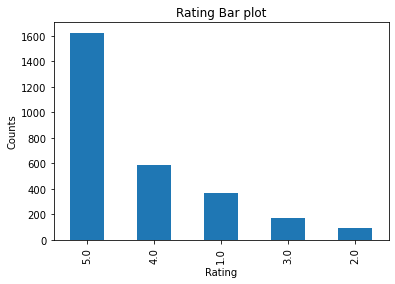

In [251]:
data["Rating"].value_counts().plot.bar()
plt.title("Rating Bar plot")
plt.xlabel("Rating")
plt.ylabel("Counts")

### Just taking the review column:

In [252]:
data = data.loc[:, data.columns == "Review_content"]
data.reset_index(inplace = True)
data = data.iloc[:, 1:]
data

Review_content
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...
1       Earlier I gave a positive review, but after ...
2       Inalsa Air Fryer...this is awesome product ....
3       I bought this in the prime day sale on 15th ...
4       Product has manufacturing defect as the righ...
...                                                 ...
2831                                              Great
2832    Oil free or less cooking is always good for ...
2833    it was waste of money & not cooking properly...
2834                Good Product, easy to use to clean.
2835    Your browser does not support HTML5 video.\n...

[2836 rows x 1 columns]

In [253]:
# Turning all reviews to string as one was float -_-
data["Review_content"] = [str(x) for x in data["Review_content"]]
data

Review_content
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...
1       Earlier I gave a positive review, but after ...
2       Inalsa Air Fryer...this is awesome product ....
3       I bought this in the prime day sale on 15th ...
4       Product has manufacturing defect as the righ...
...                                                 ...
2831                                              Great
2832    Oil free or less cooking is always good for ...
2833    it was waste of money & not cooking properly...
2834                Good Product, easy to use to clean.
2835    Your browser does not support HTML5 video.\n...

[2836 rows x 1 columns]

### Cleaning the text:

In [254]:
reviews = [x for x in data["Review_content"] if x] #removes empty fields
reviews

['  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE PRODUCT ........ PREPARED FOOD IS VERY DELICIOUS . THANKYOU .... INALSA AND AMAZON FOR PROVIDING SUCH A GOOD PRODUCT TO START OUR DAY WITH OIL FREE DISHES ....',
 "  Earlier I gave a positive review, but after using it for 1 month I would like to take back all the good things I said about the product.It is indeed cheap and the polish of the tray is coming off.What is more disappointing is their customer service, who doesn't have any credibility. They make fake commitments all the time whenever contacted.All the best if you've also purchased this item.Unfortunate Buyer,Sumit Saxena",
 '  Inalsa Air Fryer...this is awesome product ...10/10Value for money 10/10Philips vs inalsa ...inalsa10/10',
 '  I bought this in the prime day sale on 15th July,  only by the brand value, as inalsa products are great value for money as we also have other products of them. On my first try for this product i tried using mccain potato cubes in this. I start

In [255]:
#Turning the list of words in one para
text = ' '.join(reviews)
text

'  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE PRODUCT ........ PREPARED FOOD IS VERY DELICIOUS . THANKYOU .... INALSA AND AMAZON FOR PROVIDING SUCH A GOOD PRODUCT TO START OUR DAY WITH OIL FREE DISHES ....   Earlier I gave a positive review, but after using it for 1 month I would like to take back all the good things I said about the product.It is indeed cheap and the polish of the tray is coming off.What is more disappointing is their customer service, who doesn\'t have any credibility. They make fake commitments all the time whenever contacted.All the best if you\'ve also purchased this item.Unfortunate Buyer,Sumit Saxena   Inalsa Air Fryer...this is awesome product ...10/10Value for money 10/10Philips vs inalsa ...inalsa10/10   I bought this in the prime day sale on 15th July,  only by the brand value, as inalsa products are great value for money as we also have other products of them. On my first try for this product i tried using mccain potato cubes in this. I started the frye

In [256]:
# removing punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text[0:500]

'  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE PRODUCT  PREPARED FOOD IS VERY DELICIOUS  THANKYOU  INALSA AND AMAZON FOR PROVIDING SUCH A GOOD PRODUCT TO START OUR DAY WITH OIL FREE DISHES    Earlier I gave a positive review but after using it for 1 month I would like to take back all the good things I said about the productIt is indeed cheap and the polish of the tray is coming offWhat is more disappointing is their customer service who doesnt have any credibility They make fake commitments a'

### Tokenization:

In [257]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['IT', 'IS', 'MORE', 'THAN', 'VALUE', 'FOR', 'MONEY', 'HAPPY', 'WITH', 'THE', 'PRODUCT', 'PREPARED', 'FOOD', 'IS', 'VERY', 'DELICIOUS', 'THANKYOU', 'INALSA', 'AND', 'AMAZON', 'FOR', 'PROVIDING', 'SUCH', 'A', 'GOOD', 'PRODUCT', 'TO', 'START', 'OUR', 'DAY', 'WITH', 'OIL', 'FREE', 'DISHES', 'Earlier', 'I', 'gave', 'a', 'positive', 'review', 'but', 'after', 'using', 'it', 'for', '1', 'month', 'I', 'would', 'like']


In [178]:
## Run this line of code if you do not have the punkt package installed
# import nltk
# nltk.download('punkt') 

In [258]:
# converting all the text to lower capitalization
text_tokens_lower = []
for word in text_tokens:
    text_tokens_lower.append(word.lower())
print(text_tokens_lower[0:50])

['it', 'is', 'more', 'than', 'value', 'for', 'money', 'happy', 'with', 'the', 'product', 'prepared', 'food', 'is', 'very', 'delicious', 'thankyou', 'inalsa', 'and', 'amazon', 'for', 'providing', 'such', 'a', 'good', 'product', 'to', 'start', 'our', 'day', 'with', 'oil', 'free', 'dishes', 'earlier', 'i', 'gave', 'a', 'positive', 'review', 'but', 'after', 'using', 'it', 'for', '1', 'month', 'i', 'would', 'like']


In [259]:
len(text_tokens) 

61224

In [260]:
# Importing more stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [261]:
# removing all the stop words
no_stop_tokens = [word for word in text_tokens_lower if not word in stopwords]
print(no_stop_tokens[0:40])

['value', 'money', 'happy', 'product', 'prepared', 'food', 'delicious', 'thankyou', 'inalsa', 'amazon', 'providing', 'good', 'product', 'start', 'day', 'oil', 'free', 'dishes', 'earlier', 'gave', 'positive', 'review', 'using', '1', 'month', 'would', 'like', 'take', 'back', 'good', 'things', 'said', 'productit', 'indeed', 'cheap', 'polish', 'tray', 'coming', 'offwhat', 'disappointing']


In [262]:
len(no_stop_tokens)

35067

In [263]:
no_stop_cleaned = []
for text in no_stop_tokens:
    text =  ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', str(text).lower()).split())
    no_stop_cleaned.append(text)

### Stemming:

In [264]:
porter = PorterStemmer()

stemmed_words = [porter.stem(word) for word in no_stop_cleaned]
print(stemmed_words[0:25])

['valu', 'money', 'happi', 'product', 'prepar', 'food', 'delici', 'thankyou', 'inalsa', 'amazon', 'provid', 'good', 'product', 'start', 'day', 'oil', 'free', 'dish', 'earlier', 'gave', 'posit', 'review', 'use', '1', 'month']


### Lemmatization:

In [265]:
wnl = WordNetLemmatizer()

lemmas = [wnl.lemmatize(word) for word in no_stop_cleaned]
print(lemmas[0:25])

['value', 'money', 'happy', 'product', 'prepared', 'food', 'delicious', 'thankyou', 'inalsa', 'amazon', 'providing', 'good', 'product', 'start', 'day', 'oil', 'free', 'dish', 'earlier', 'gave', 'positive', 'review', 'using', '1', 'month']


### Parts Of Speech:

In [266]:
pos_tagged = nltk.pos_tag(no_stop_tokens)
pos_tagged

pos_tagged_df = pd.DataFrame(pos_tagged, columns=["Word", "POS"])
pos_tagged_df

Word  POS
0         value   NN
1         money   NN
2         happy   JJ
3       product   NN
4      prepared  VBN
...         ...  ...
35062      easy   JJ
35063       use   NN
35064      food   NN
35065     comes  VBZ
35066      good   JJ

[35067 rows x 2 columns]

##### POS is not required in the approach we have taken, Still it is done for the sake of it.

### Count Vectorizing:

In [267]:
def easy_text_cleaner(data):
    df = data["Review_content"]
    
    cleaned_text_list = [] 
    
    for text in df:
        text =  ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', str(text).lower()).split())
        cleaned_text_list.append(text)
        
    data["Cleaned_reviews"] = cleaned_text_list
    
    return data

In [268]:
data = easy_text_cleaner(data)
data

Review_content  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...   
1       Earlier I gave a positive review, but after ...   
2       Inalsa Air Fryer...this is awesome product ....   
3       I bought this in the prime day sale on 15th ...   
4       Product has manufacturing defect as the righ...   
...                                                 ...   
2831                                              Great   
2832    Oil free or less cooking is always good for ...   
2833    it was waste of money & not cooking properly...   
2834                Good Product, easy to use to clean.   
2835    Your browser does not support HTML5 video.\n...   

                                        Cleaned_reviews  
0     it is more than value for money happy with the...  
1     earlier i gave a positive review but after usi...  
2     inalsa air fryer this is awesome product 10 10...  
3     i bought this in the prime day sale on 15th ju...  
4     product has manufacturing defect as the right ...  
...                                                 ...  
2831                                              great  
2832  oil free or less cooking is always good for he...  
2833  it was waste of money not cooking properly poo...  
2834                  good product easy to use to clean  
2835  your browser does not support html5 video easy...  

[2836 rows x 2 columns]

In [195]:
# Counting how many times the words are come in the list of documents (considering each review is a document)
vectorizer = CountVectorizer(stop_words=stopwords)
list_of_corpus = [x for x in data["Cleaned_reviews"]]
 
X = vectorizer.fit_transform(list_of_corpus)

words_list = vectorizer.get_feature_names()
count_list = X.toarray().sum(axis=0)
counter = dict(zip(words_list, count_list))
counter

{'000': 5,
 '000and': 1,
 '01': 1,
 '03': 1,
 '04months': 1,
 '08': 2,
 '10': 42,
 '100': 9,
 '10days': 1,
 '10k': 4,
 '10mins': 2,
 '10philips': 1,
 '10value': 1,
 '11': 2,
 '11th': 1,
 '12': 5,
 '1200': 1,
 '1230': 1,
 '1230h': 1,
 '12min': 1,
 '13': 1,
 '1350': 1,
 '14': 1,
 '1450': 1,
 '14th': 1,
 '15': 33,
 '150': 1,
 '1500': 3,
 '15000': 1,
 '1500w': 1,
 '15days': 1,
 '15min': 2,
 '15mins': 1,
 '15th': 2,
 '16': 1,
 '16a': 1,
 '17': 1,
 '1730h': 1,
 '180': 6,
 '1800': 1,
 '19': 2,
 '19th': 3,
 '1kwh': 1,
 '1lt': 1,
 '1myblast': 1,
 '1st': 6,
 '1swt58yatri': 1,
 '1year': 1,
 '20': 22,
 '200': 9,
 '2000': 1,
 '200c': 1,
 '2015': 1,
 '2016': 3,
 '2017': 5,
 '2018': 3,
 '2019': 3,
 '2020': 7,
 '2020i': 1,
 '2021': 2,
 '20min': 1,
 '20mins': 2,
 '21': 2,
 '21st': 1,
 '24': 5,
 '24hrs': 2,
 '25': 5,
 '2500': 2,
 '250v': 1,
 '25th': 3,
 '27': 1,
 '27july': 1,
 '27oct': 1,
 '28': 1,
 '2800': 1,
 '28nov': 1,
 '28oz': 1,
 '28th': 2,
 '29': 4,
 '2items': 1,
 '2k': 1,
 '2l': 4,
 '2lt': 1,
 '

In [196]:
# Sorting in descending and maximum of 20 set by us

sorted_list_desc_cv = list(sorted(counter.items(),
                           key=lambda item: item[1],
                           reverse=True))
    
max_words_df_cv = pd.DataFrame(sorted_list_desc_cv[:20],columns=["common_words", "count"])

max_words_df_cv

common_words  count
0       product   1541
1          good    927
2           use    566
3           oil    510
4          easy    475
5          food    351
6           air    324
7         fryer    312
8         great    272
9           one    238
10         time    233
11        fries    223
12      cooking    217
13          buy    206
14         well    200
15       amazon    199
16    excellent    199
17         best    191
18         nice    188
19      philips    181

In [197]:
def most_common_words(data,type=""):
    '''Plotting most common words'''
    fig = px.bar(data, x="count", y="common_words", title=f'Most Commmon Words in {type} reviews', orientation='h', 
             width=700, height=700,color='common_words')
    fig.show()

In [198]:
most_common_words(max_words_df_cv, "All") 

### Bigram:

In [233]:
#This is the same but with bigram or 2 words

vectorizer_bigram = CountVectorizer(analyzer='word',ngram_range=(2,2), max_features=1000, stop_words=stopwords)
bow_matrix_bigram =vectorizer_bigram.fit_transform(list_of_corpus)

words_list_bigram = vectorizer_bigram.get_feature_names()
count_list_bigram = bow_matrix_bigram.toarray().sum(axis=0)
counter_bigram = dict(zip(words_list_bigram, count_list_bigram))
counter_bigram

{'10 15': 5,
 '10 days': 5,
 '10 mins': 5,
 '15 20': 3,
 '15 days': 6,
 '15 mins': 5,
 '15 minutes': 8,
 '1st use': 3,
 '20 mins': 6,
 '20 minutes': 7,
 '200 degree': 4,
 '24 hours': 4,
 'absolutely love': 4,
 'absolutely loved': 3,
 'addition kitchen': 8,
 'air fried': 12,
 'air frier': 12,
 'air fry': 9,
 'air fryer': 226,
 'air fryers': 17,
 'air frying': 14,
 'air technology': 5,
 'airfryer good': 3,
 'almost daily': 3,
 'almost every': 4,
 'almost everything': 7,
 'almost oil': 6,
 'already used': 4,
 'also get': 4,
 'also good': 17,
 'amazing easy': 4,
 'amazing product': 45,
 'amazing quality': 5,
 'amazon delivered': 3,
 'amazon delivery': 3,
 'amazon great': 4,
 'amazon india': 4,
 'amazon providing': 4,
 'amazon service': 4,
 'amount oil': 6,
 'appliance kitchen': 4,
 'arrange send': 3,
 'avoid oil': 7,
 'awesome product': 34,
 'bad experience': 6,
 'bad health': 4,
 'bad product': 8,
 'baking cake': 4,
 'baking tray': 4,
 'best air': 5,
 'best best': 4,
 'best class': 4,
 'b

In [234]:
sorted_list_desc_bi = list(sorted(counter_bigram.items(),
                           key=lambda item: item[1],
                           reverse=True))
    
max_words_df_bi = pd.DataFrame(sorted_list_desc_bi[:20],columns=["common_words", "count"])

max_words_df_bi

common_words  count
0            easy use    306
1        good product    258
2           air fryer    226
3        french fries    118
4   excellent product    108
5       great product     94
6         value money     91
7        nice product     84
8         recipe book     66
9          easy clean     60
10       product easy     58
11           less oil     57
12           oil free     53
13       product good     52
14        without oil     46
15    amazing product     45
16   health conscious     39
17         fried food     38
18          use clean     36
19    awesome product     34

In [235]:
most_common_words(max_words_df_bi, "All Bigram") 

### Trigram:

In [236]:
# Same but with 3 words

vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(3,3), max_features=1000, stop_words=stopwords)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(list_of_corpus)

In [237]:
words_list_trigram = vectorizer_ngram_range.get_feature_names()
count_list_trigram = bow_matrix_ngram.toarray().sum(axis=0)
counter_trigram = dict(zip(words_list_trigram, count_list_trigram))
counter_trigram

{'10 mins 180': 2,
 '10 ml oil': 2,
 '100 oil free': 2,
 '15 20 minutes': 3,
 '180 200 degree': 2,
 '80 less oil': 2,
 'absolute value money': 2,
 'absolutely amazing product': 2,
 'absolutely loved product': 2,
 'air fried food': 2,
 'air frier keeps': 2,
 'air fryer awesome': 2,
 'air fryer bought': 2,
 'air fryer broken': 2,
 'air fryer budget': 2,
 'air fryer cooking': 2,
 'air fryer easy': 6,
 'air fryer first': 4,
 'air fryer good': 7,
 'air fryer happy': 2,
 'air fryer helps': 2,
 'air fryer made': 2,
 'air fryer may': 2,
 'air fryer must': 3,
 'air fryer nothing': 2,
 'air fryer philips': 5,
 'air fryer price': 2,
 'air fryer product': 2,
 'air fryer provides': 2,
 'air fryer rapid': 3,
 'air fryer recently': 3,
 'air fryer since': 2,
 'air fryer stopped': 2,
 'air fryer use': 2,
 'air fryer useful': 2,
 'air fryer want': 2,
 'air fryer works': 4,
 'air fryer worth': 3,
 'air fryer would': 2,
 'air fryers come': 2,
 'air fryers market': 2,
 'air frying good': 2,
 'air technolog

In [238]:
sorted_list_desc_tri = list(sorted(counter_trigram.items(),
                           key=lambda item: item[1],
                           reverse=True))
    
max_words_df_tri = pd.DataFrame(sorted_list_desc_tri[:20],columns=["common_words", "count"])

max_words_df_tri

common_words  count
0           product easy use     45
1             easy use clean     36
2             use easy clean     23
3              easy use easy     21
4          philips air fryer     20
5          good product easy     15
6    health conscious people     15
7           oil free cooking     15
8              easy use good     14
9   product reasonable price     14
10       product value money     13
11             good easy use     12
12         made french fries     12
13     browser support html5     10
14          inalsa air fryer     10
15             oil free food     10
16       support html5 video     10
17        tried french fries     10
18          good value money      9
19          easy use product      8

In [239]:
most_common_words(max_words_df_tri, "All Trigram") 

### TFIDF Vectorizer:

##### CountVectorizer just gives us the bag of words and there is no semantic meaning to the same. TFIDF on the other hand gives meaning to the more weighted words. Therefore the values will be in decimals. 
##### Also, TFIDF can be used in other machine leaning algos such as Naive bayes or Neural networks to find out the y variable. 
##### TFIDF can also be used in Search engines, as the corpuses that have the keywords weighing more than the others can be shown to the person 

In [242]:
# TFID Vectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,1), max_features = 500, stop_words=stopwords)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(list_of_corpus)


feature_list_tfid = vectorizer_n_gram_max_features.get_feature_names()
weight_list_tfid = tf_idf_matrix_n_gram_max_features.toarray().sum(axis=0)
counter_tfid = dict(zip(feature_list_tfid, weight_list_tfid))
counter_tfid

{'10': 9.198985183933873,
 '15': 7.906187594437012,
 '20': 5.446442557366298,
 'able': 5.024398706025979,
 'absolutely': 10.570533195812644,
 'accessories': 7.528648994665341,
 'actually': 3.498393683406892,
 'add': 4.184433765515449,
 'additional': 4.179472649486334,
 'advertised': 5.5667191992102225,
 'air': 52.84379060257805,
 'airfryer': 18.147010958639484,
 'almost': 13.243132960383333,
 'already': 5.07449130223695,
 'also': 33.20366385162462,
 'alternative': 4.277831835683643,
 'always': 7.006345608861667,
 'amazing': 35.24441725816439,
 'amazon': 40.62685882563868,
 'amount': 3.7604077240502516,
 'another': 4.754266426991826,
 'anything': 4.778377023762936,
 'appliance': 9.903329542558092,
 'around': 4.695599849949303,
 'arrived': 5.054047464281484,
 'available': 7.890091516917292,
 'avoid': 6.43539949106481,
 'awesome': 42.400241902701374,
 'back': 9.366139104685294,
 'bad': 15.555706224339286,
 'bake': 6.277324145023606,
 'baking': 7.486698530038111,
 'basket': 13.988038469013

In [243]:
sorted_list_desc_tfid = list(sorted(counter_tfid.items(),
                           key=lambda item: item[1],
                           reverse=True))
    
max_words_df_tfid = pd.DataFrame(sorted_list_desc_tfid[:20],columns=["common_words", "count"])

max_words_df_tfid

common_words       count
0       product  299.127059
1          good  297.264631
2           use  131.132960
3          easy  130.146239
4          nice   89.547826
5         great   88.264076
6     excellent   87.494553
7           oil   84.929335
8          food   66.991245
9         money   58.973208
10          buy   56.597849
11        fryer   53.923554
12          one   53.627244
13         best   52.957177
14          air   52.843791
15      cooking   51.543667
16        price   48.707466
17       useful   48.158121
18        value   46.645526
19         time   45.027371

In [244]:
most_common_words(max_words_df_tfid, "all words with weights") 

### Wordcloud of whole data:

In [28]:
# making a para from lemas list
lemma_para = ' '.join(lemmas)

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

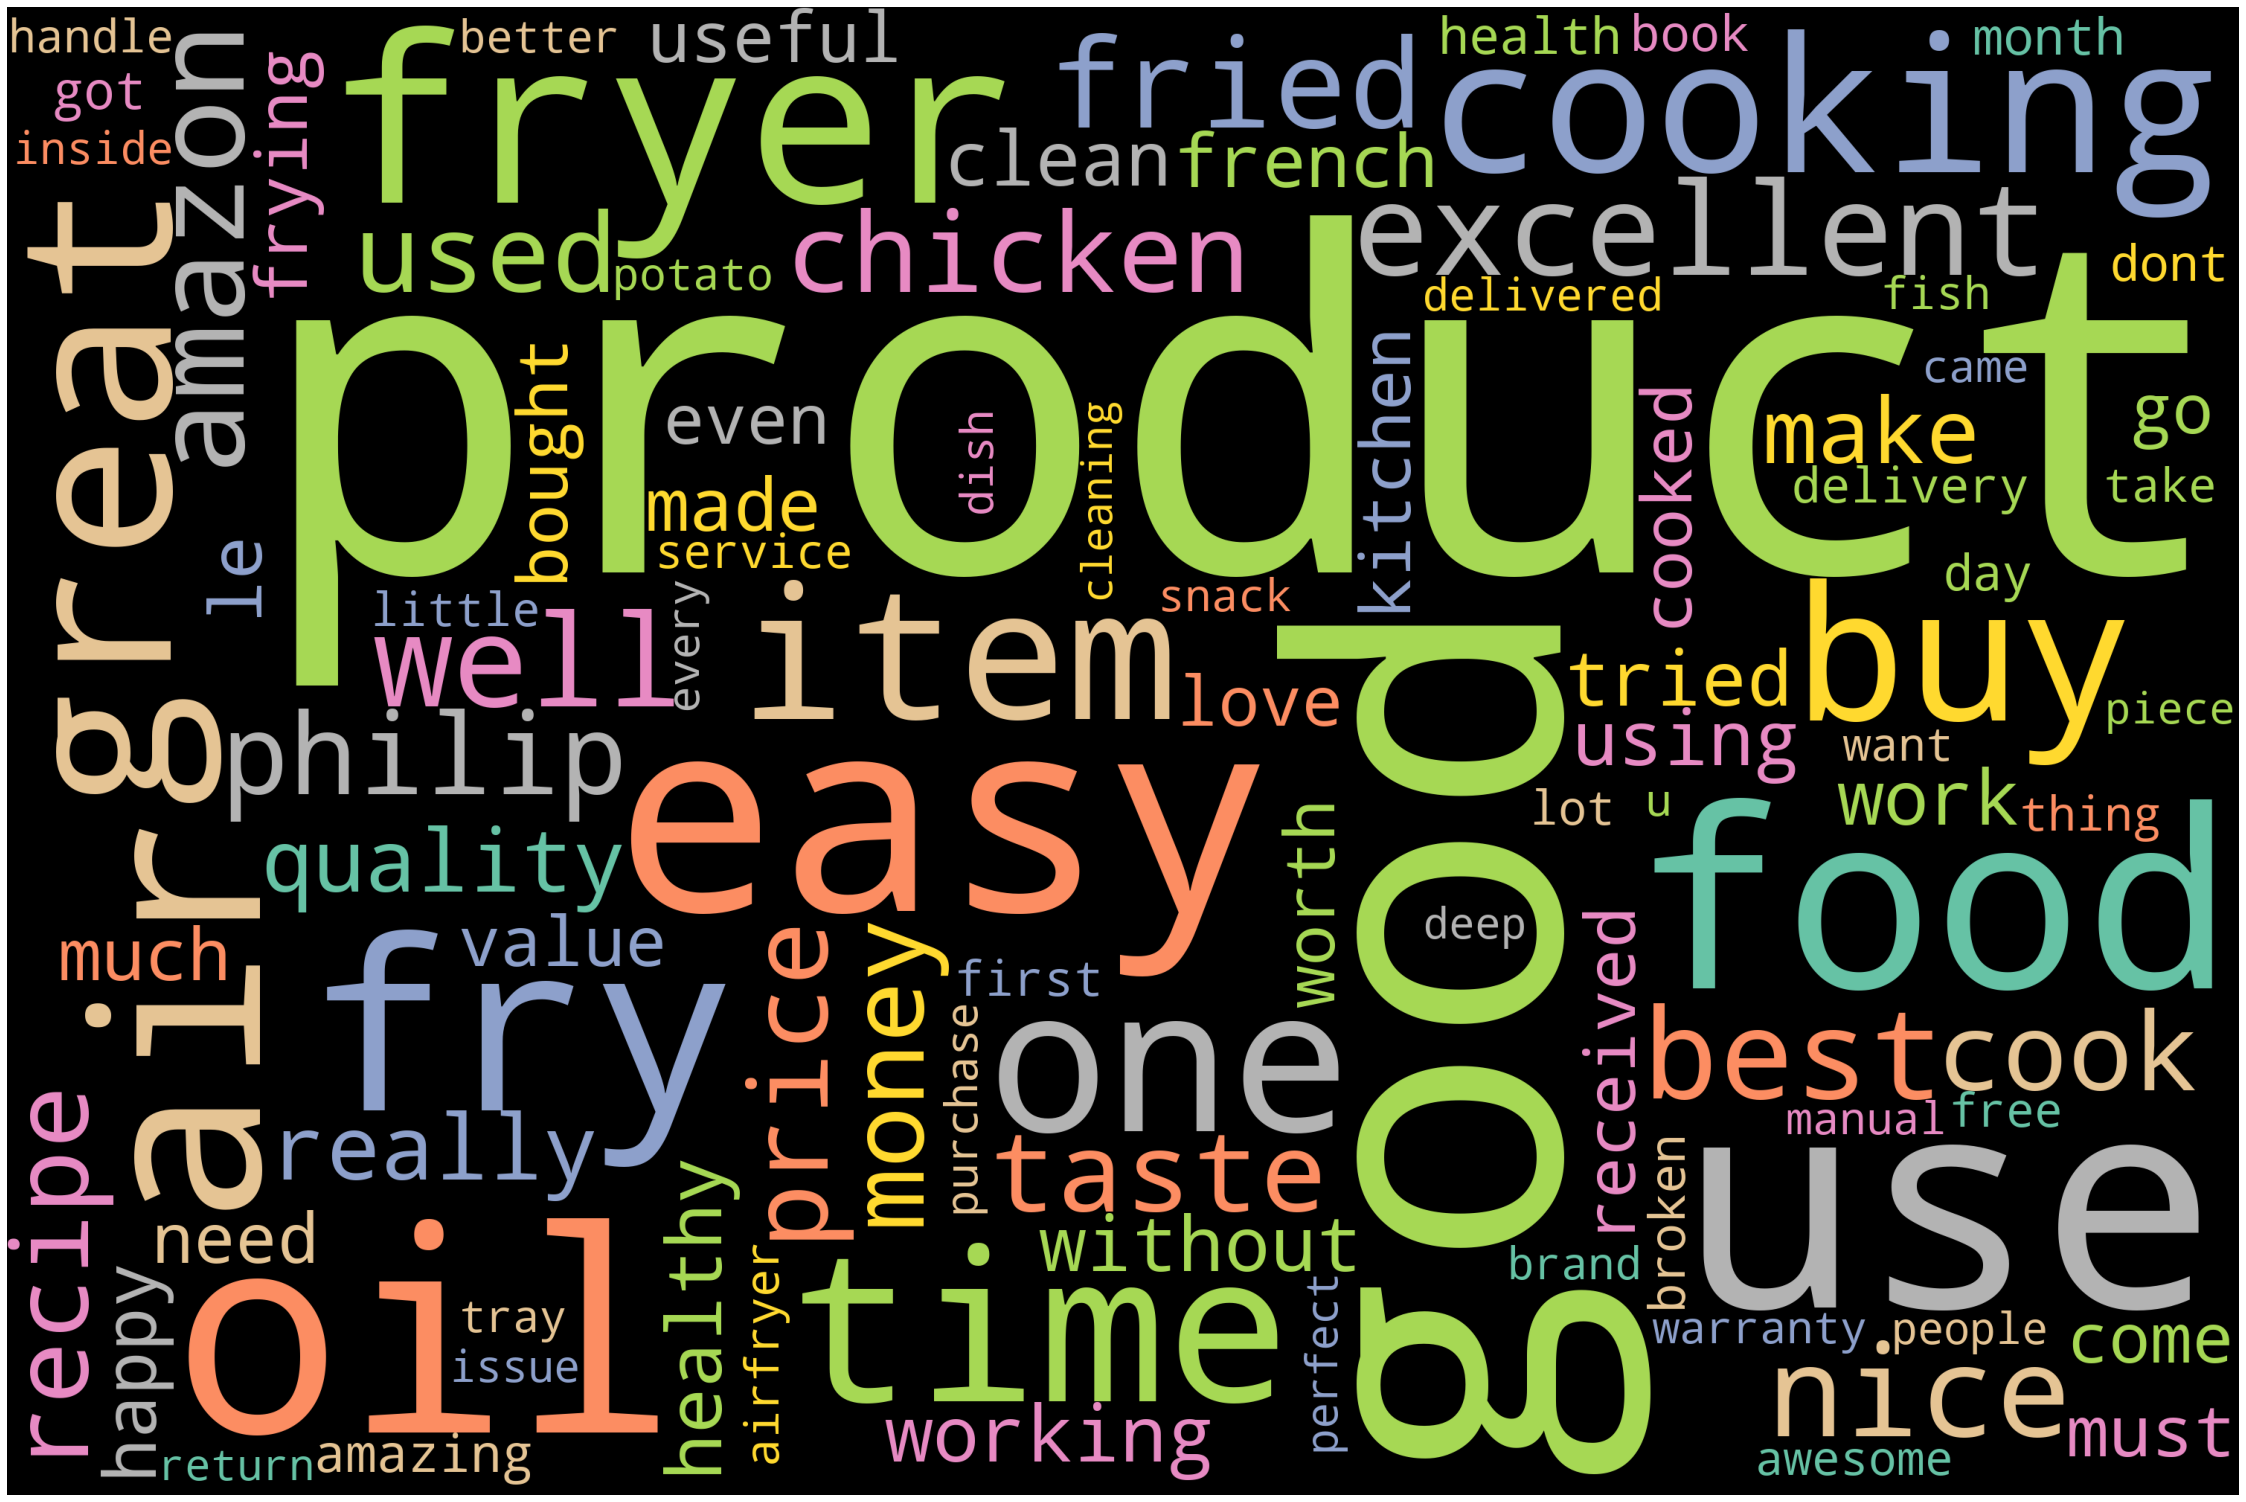

In [30]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords, collocations=False).generate(lemma_para)
# Plot
plot_cloud(wordcloud)

### Sentiment Analysis:

In [31]:
data

Review_content
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...
1       Earlier I gave a positive review, but after ...
2       Inalsa Air Fryer...this is awesome product ....
3       I bought this in the prime day sale on 15th ...
4       Product has manufacturing defect as the righ...
...                                                 ...
2831                                              Great
2832    Oil free or less cooking is always good for ...
2833    it was waste of money & not cooking properly...
2834                Good Product, easy to use to clean.
2835    Your browser does not support HTML5 video.\n...

[2836 rows x 1 columns]

In [76]:
def sentiment_analyzer(text):
    '''Creating TextBlob object'''
    blob = TextBlob(text)
    return blob.sentiment[0]

In [78]:
data = easy_text_cleaner(data)
data

Review_content  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...   
1       Earlier I gave a positive review, but after ...   
2       Inalsa Air Fryer...this is awesome product ....   
3       I bought this in the prime day sale on 15th ...   
4       Product has manufacturing defect as the righ...   
...                                                 ...   
2831                                              Great   
2832    Oil free or less cooking is always good for ...   
2833    it was waste of money & not cooking properly...   
2834                Good Product, easy to use to clean.   
2835    Your browser does not support HTML5 video.\n...   

                                        Cleaned_reviews  
0     it is more than value for money happy with the...  
1     earlier i gave a positive review but after usi...  
2     inalsa air fryer this is awesome product 10 10...  
3     i bought this in the prime day sale on 15th ju...  
4     product has manufacturing defect as the right ...  
...                                                 ...  
2831                                              great  
2832  oil free or less cooking is always good for he...  
2833  it was waste of money not cooking properly poo...  
2834                  good product easy to use to clean  
2835  your browser does not support html5 video easy...  

[2836 rows x 2 columns]

In [79]:
# Creating column in dataframe

sentiments = []
textblob_polarity = []

for x in data["Cleaned_reviews"]:
    textblob_polarity.append(sentiment_analyzer(x))
    if 0.8 <= sentiment_analyzer(x) > 0:
        sentiments.append("Very positive")
    elif -0.8 >= sentiment_analyzer(x) < 0:
        sentiments.append("Very negative")
    elif sentiment_analyzer(x) > 0:
        sentiments.append("Positive")
    elif sentiment_analyzer(x) < 0:
        sentiments.append("Negative") 
    else:
        sentiments.append("Neutral")
        
data["Textblob_Sentiment"] = sentiments

data["Textblob_polarity"] = textblob_polarity

data

Review_content  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...   
1       Earlier I gave a positive review, but after ...   
2       Inalsa Air Fryer...this is awesome product ....   
3       I bought this in the prime day sale on 15th ...   
4       Product has manufacturing defect as the righ...   
...                                                 ...   
2831                                              Great   
2832    Oil free or less cooking is always good for ...   
2833    it was waste of money & not cooking properly...   
2834                Good Product, easy to use to clean.   
2835    Your browser does not support HTML5 video.\n...   

                                        Cleaned_reviews Textblob_Sentiment  \
0     it is more than value for money happy with the...           Positive   
1     earlier i gave a positive review but after usi...           Positive   
2     inalsa air fryer this is awesome product 10 10...      Very positive   
3     i bought this in the prime day sale on 15th ju...           Positive   
4     product has manufacturing defect as the right ...           Positive   
...                                                 ...                ...   
2831                                              great      Very positive   
2832  oil free or less cooking is always good for he...           Positive   
2833  it was waste of money not cooking properly poo...           Negative   
2834                  good product easy to use to clean           Positive   
2835  your browser does not support html5 video easy...           Positive   

      Textblob_polarity  
0              0.566667  
1              0.122727  
2              1.000000  
3              0.124192  
4              0.130357  
...                 ...  
2831           0.800000  
2832           0.200530  
2833          -0.280000  
2834           0.500000  
2835           0.566667  

[2836 rows x 4 columns]

### Checking if people are positive or negative in the reviews:

<AxesSubplot:>

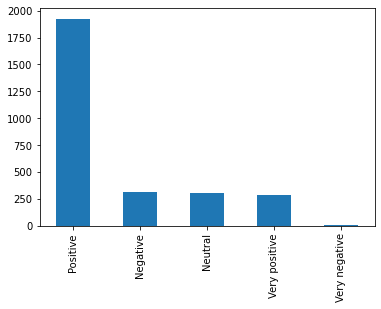

In [80]:
data["Textblob_Sentiment"].value_counts().plot.bar()

In [82]:
textblob_values = data["Textblob_Sentiment"].value_counts()

textblob_numbers = [x for x in textblob_values]
fig = go.Figure(go.Funnelarea(
    text = textblob_values.keys(),
    values = textblob_numbers,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

#### Sentiment analysis using nltk:

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [84]:
vader_sentiments = []
vader_neg = []
vader_pos = []

for index in range(len(data["Cleaned_reviews"])):
    score = sid.polarity_scores(data["Cleaned_reviews"][index])
    vader_neg.append(score["neg"])
    vader_pos.append(score["pos"])
    
    if score["pos"] > score["neg"] and score["pos"] >= 0.8:
        vader_sentiments.append("Very positive")
    elif score["pos"] < score["neg"] and score["neg"] >= 0.8:
        vader_sentiments.append("Very negative")
    elif score["pos"] > score["neg"]:
        vader_sentiments.append("Positive")
    elif score["neg"] > score["pos"]:
        vader_sentiments.append("Negative")
    else:
        vader_sentiments.append("Neutral")      


data["Sentiment_VADER"] = vader_sentiments
data["Vader_neg"] = vader_neg
data["Vader_pos"] = vader_pos
data

Review_content  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...   
1       Earlier I gave a positive review, but after ...   
2       Inalsa Air Fryer...this is awesome product ....   
3       I bought this in the prime day sale on 15th ...   
4       Product has manufacturing defect as the righ...   
...                                                 ...   
2831                                              Great   
2832    Oil free or less cooking is always good for ...   
2833    it was waste of money & not cooking properly...   
2834                Good Product, easy to use to clean.   
2835    Your browser does not support HTML5 video.\n...   

                                        Cleaned_reviews Textblob_Sentiment  \
0     it is more than value for money happy with the...           Positive   
1     earlier i gave a positive review but after usi...           Positive   
2     inalsa air fryer this is awesome product 10 10...      Very positive   
3     i bought this in the prime day sale on 15th ju...           Positive   
4     product has manufacturing defect as the right ...           Positive   
...                                                 ...                ...   
2831                                              great      Very positive   
2832  oil free or less cooking is always good for he...           Positive   
2833  it was waste of money not cooking properly poo...           Negative   
2834                  good product easy to use to clean           Positive   
2835  your browser does not support html5 video easy...           Positive   

      Textblob_polarity Sentiment_VADER  Vader_neg  Vader_pos  
0              0.566667        Positive      0.000      0.437  
1              0.122727        Positive      0.137      0.181  
2              1.000000        Positive      0.000      0.204  
3              0.124192        Negative      0.092      0.072  
4              0.130357        Negative      0.403      0.000  
...                 ...             ...        ...        ...  
2831           0.800000   Very positive      0.000      1.000  
2832           0.200530        Positive      0.087      0.104  
2833          -0.280000        Negative      0.267      0.155  
2834           0.500000        Positive      0.000      0.680  
2835           0.566667        Positive      0.107      0.275  

[2836 rows x 7 columns]

<AxesSubplot:>

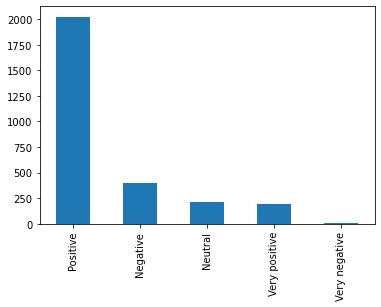

In [85]:
data["Sentiment_VADER"].value_counts().plot.bar()

In [86]:
values_vader = data["Sentiment_VADER"].value_counts()

values_vader_numbers = [x for x in values_vader]
fig = go.Figure(go.Funnelarea(
    text = values_vader.keys(),
    values = values_vader_numbers,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [89]:
data["Rating"] = [float(x.rstrip(" out of 5 stars")) for x in data["Rating"]]
data

Review_content  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...   
1       Earlier I gave a positive review, but after ...   
2       Inalsa Air Fryer...this is awesome product ....   
3       I bought this in the prime day sale on 15th ...   
4       Product has manufacturing defect as the righ...   
...                                                 ...   
2831                                              Great   
2832    Oil free or less cooking is always good for ...   
2833    it was waste of money & not cooking properly...   
2834                Good Product, easy to use to clean.   
2835    Your browser does not support HTML5 video.\n...   

                                        Cleaned_reviews Textblob_Sentiment  \
0     it is more than value for money happy with the...           Positive   
1     earlier i gave a positive review but after usi...           Positive   
2     inalsa air fryer this is awesome product 10 10...      Very positive   
3     i bought this in the prime day sale on 15th ju...           Positive   
4     product has manufacturing defect as the right ...           Positive   
...                                                 ...                ...   
2831                                              great      Very positive   
2832  oil free or less cooking is always good for he...           Positive   
2833  it was waste of money not cooking properly poo...           Negative   
2834                  good product easy to use to clean           Positive   
2835  your browser does not support html5 video easy...           Positive   

      Textblob_polarity Sentiment_VADER  Vader_neg  Vader_pos  Rating  
0              0.566667        Positive      0.000      0.437     5.0  
1              0.122727        Positive      0.137      0.181     1.0  
2              1.000000        Positive      0.000      0.204     5.0  
3              0.124192        Negative      0.092      0.072     2.0  
4              0.130357        Negative      0.403      0.000     1.0  
...                 ...             ...        ...        ...     ...  
2831           0.800000   Very positive      0.000      1.000     5.0  
2832           0.200530        Positive      0.087      0.104     3.0  
2833          -0.280000        Negative      0.267      0.155     1.0  
2834           0.500000        Positive      0.000      0.680     4.0  
2835           0.566667        Positive      0.107      0.275     5.0  

[2836 rows x 8 columns]

### K-means Clustering:

In [93]:
kmean_df = data.copy()

kmean_df = kmean_df.iloc[:,2:]
kmean_df

Textblob_Sentiment  Textblob_polarity Sentiment_VADER  Vader_neg  \
0              Positive           0.566667        Positive      0.000   
1              Positive           0.122727        Positive      0.137   
2         Very positive           1.000000        Positive      0.000   
3              Positive           0.124192        Negative      0.092   
4              Positive           0.130357        Negative      0.403   
...                 ...                ...             ...        ...   
2831      Very positive           0.800000   Very positive      0.000   
2832           Positive           0.200530        Positive      0.087   
2833           Negative          -0.280000        Negative      0.267   
2834           Positive           0.500000        Positive      0.000   
2835           Positive           0.566667        Positive      0.107   

      Vader_pos  Rating  
0         0.437     5.0  
1         0.181     1.0  
2         0.204     5.0  
3         0.072     2.0  
4         0.000     1.0  
...         ...     ...  
2831      1.000     5.0  
2832      0.104     3.0  
2833      0.155     1.0  
2834      0.680     4.0  
2835      0.275     5.0  

[2836 rows x 6 columns]

In [98]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [95]:
le = preprocessing.LabelEncoder()
kmean_df["Textblob_Sentiment"] = le.fit_transform(data["Textblob_Sentiment"])
kmean_df["Sentiment_VADER"] = le.fit_transform(data["Sentiment_VADER"])
kmean_df.head()

Textblob_Sentiment  Textblob_polarity  Sentiment_VADER  Vader_neg  \
0                   2           0.566667                2      0.000   
1                   2           0.122727                2      0.137   
2                   4           1.000000                2      0.000   
3                   2           0.124192                0      0.092   
4                   2           0.130357                0      0.403   

   Vader_pos  Rating  
0      0.437     5.0  
1      0.181     1.0  
2      0.204     5.0  
3      0.072     2.0  
4      0.000     1.0

In [96]:
scaler = preprocessing.StandardScaler()
kmean_sc = scaler.fit_transform(kmean_df)
kmean_sc = pd.DataFrame(kmean_sc)
kmean_sc.head()

0         1         2         3         4         5
0  0.126074  0.611730  0.231845 -0.446378  0.290425  0.678015
1  0.126074 -0.647163  0.231845  0.714255 -0.627593 -2.209148
2  2.192817  1.840547  0.231845 -0.446378 -0.545115  0.678015
3  0.126074 -0.643010 -1.909887  0.333025 -1.018468 -1.487357
4  0.126074 -0.625527 -1.909887  2.967747 -1.276660 -2.209148

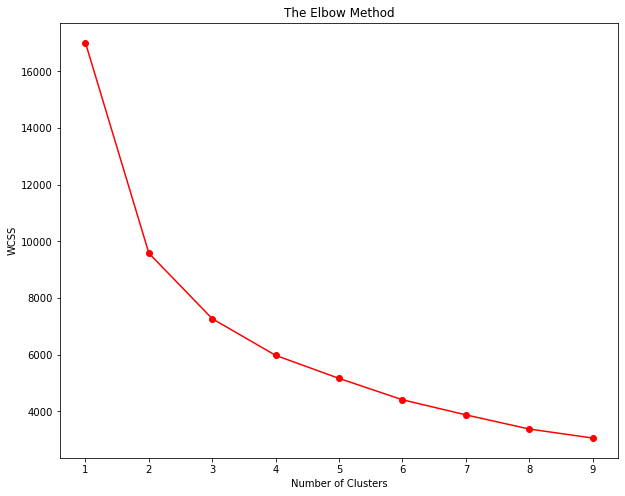

In [99]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i)
    clf.fit(kmean_sc)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 10), WCSS, "o-r")
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

##### We see that the Knee or elbow is at 3 therefore we can use k=3

In [100]:
# Building and predicting the model
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(kmean_sc)

In [101]:
predicted = pd.Series(y_kmeans)
kmean_df['K_clust'] = predicted 
kmean_df

Textblob_Sentiment  Textblob_polarity  Sentiment_VADER  Vader_neg  \
0                      2           0.566667                2      0.000   
1                      2           0.122727                2      0.137   
2                      4           1.000000                2      0.000   
3                      2           0.124192                0      0.092   
4                      2           0.130357                0      0.403   
...                  ...                ...              ...        ...   
2831                   4           0.800000                4      0.000   
2832                   2           0.200530                2      0.087   
2833                   0          -0.280000                0      0.267   
2834                   2           0.500000                2      0.000   
2835                   2           0.566667                2      0.107   

      Vader_pos  Rating  K_clust  
0         0.437     5.0        0  
1         0.181     1.0        2  
2         0.204     5.0        1  
3         0.072     2.0        2  
4         0.000     1.0        2  
...         ...     ...      ...  
2831      1.000     5.0        1  
2832      0.104     3.0        0  
2833      0.155     1.0        2  
2834      0.680     4.0        1  
2835      0.275     5.0        0  

[2836 rows x 7 columns]

Text(0, 0.5, 'Textblob Score')

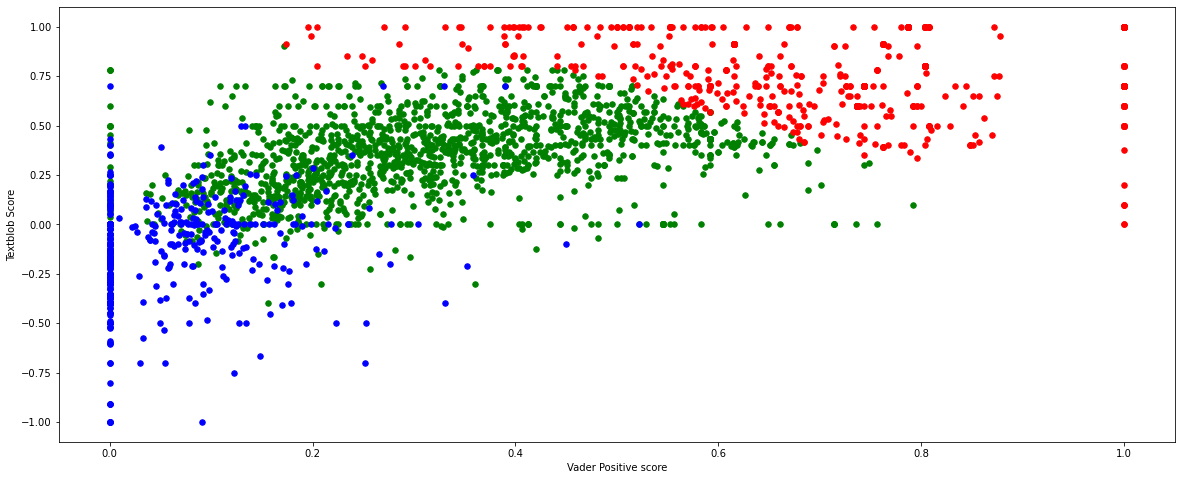

In [114]:
# Plotting the clusters

plt.rcParams["figure.figsize"] = (20,8)
df0 = kmean_df[kmean_df.K_clust==0]
df1 = kmean_df[kmean_df.K_clust==1]
df2 = kmean_df[kmean_df.K_clust==2]
plt.scatter(df0.Vader_pos, df0.Textblob_polarity,s=30, color="green")
plt.scatter(df1.Vader_pos, df1.Textblob_polarity,s=30, color="red")
plt.scatter(df2.Vader_pos, df2.Textblob_polarity,s=30, color="blue")
plt.xlabel("Vader Positive score")
plt.ylabel("Textblob Score")

##### Observation: We see that there are 3 clusters which can be termed as Positive, Negative and Neutral. We also can observe that the categories are fitting correctly using both NLTK's Vader and Textblob modules.

##### We can see that more people are positive about these products. Thats good news for our client!!

### Emotion Mining:

In [492]:
# approx 10 mins to run
emotion_list = []
line_number = 1

loading = 1
print("Computer takes time to understand feeling of humans! Please wait for some time :)\n")
print("Loading (wait till completes 100):")
for line in data["Review_content"]:
    if line_number == int(loading * (len(data["Review_content"]) / 100)):
    
        print(loading, end="..")
        loading += 1
    
    emotion_list.append(te.get_emotion(line))
    line_number += 1

print("Done!\n\nThat took some time! Humans are difficult to understand :P")

Computer takes time to understand feeling of humans! Please wait for some time :)

Loading (wait till completes 100):
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..17..18..19..20..21..22..23..24..25..26..27..28..29..30..31..32..33..34..35..36..37..38..39..40..41..42..43..44..45..46..47..48..49..50..51..52..53..54..55..56..57..58..59..60..61..62..63..64..65..66..67..68..69..70..71..72..73..74..75..76..77..78..79..80..81..82..83..84..85..86..87..88..89..90..91..92..93..94..95..96..97..98..99..100..Done!

That took some time! Humans are difficult to understand :P


In [493]:
var = list(emotion_list[0].keys())
for item in var:
    data[item] = [x[item] for x in emotion_list]
data

Review_content Sentiment  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive   
1       Earlier I gave a positive review, but after ...  Positive   
2       Inalsa Air Fryer...this is awesome product ....  Positive   
3       I bought this in the prime day sale on 15th ...  Positive   
4       Product has manufacturing defect as the righ...  Positive   
...                                                 ...       ...   
2831                                              Great  Positive   
2832    Oil free or less cooking is always good for ...  Positive   
2833    it was waste of money & not cooking properly...  Negative   
2834                Good Product, easy to use to clean.  Positive   
2835    Your browser does not support HTML5 video.\n...  Positive   

     Sentiment_VADER  Happy  Angry  Surprise   Sad  Fear  
0           Positive   0.80   0.00      0.00  0.20  0.00  
1           Positive   0.08   0.08      0.31  0.31  0.23  
2           Positive   0.00   0.00      1.00  0.00  0.00  
3           Negative   0.16   0.12      0.22  0.19  0.31  
4           Negative   0.00   0.00      0.00  0.25  0.75  
...              ...    ...    ...       ...   ...   ...  
2831        Positive   1.00   0.00      0.00  0.00  0.00  
2832        Positive   0.25   0.00      0.00  0.50  0.25  
2833        Negative   0.40   0.00      0.40  0.20  0.00  
2834        Positive   1.00   0.00      0.00  0.00  0.00  
2835        Positive   0.50   0.00      0.50  0.00  0.00  

[2836 rows x 8 columns]

In [498]:
names = [x for x in raw_data["Name"]]

data["Name"] = names

In [499]:
data.head()

Review_content Sentiment  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive   
1    Earlier I gave a positive review, but after ...  Positive   
2    Inalsa Air Fryer...this is awesome product ....  Positive   
3    I bought this in the prime day sale on 15th ...  Positive   
4    Product has manufacturing defect as the righ...  Positive   

  Sentiment_VADER  Happy  Angry  Surprise   Sad  Fear             Name  
0        Positive   0.80   0.00      0.00  0.20  0.00      SonamGupta   
1        Positive   0.08   0.08      0.31  0.31  0.23     Sumit Saxena  
2        Positive   0.00   0.00      1.00  0.00  0.00     Ankit Mishra  
3        Negative   0.16   0.12      0.22  0.19  0.31     Tushar Arora  
4        Negative   0.00   0.00      0.00  0.25  0.75  Amazon Customer

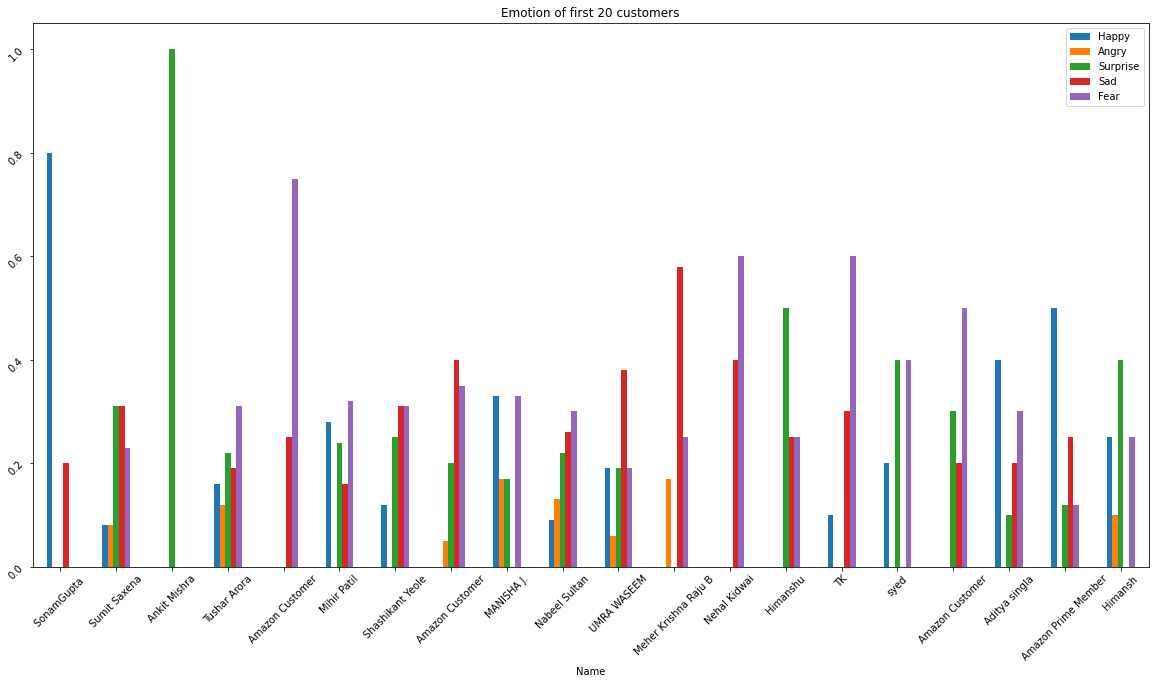

In [515]:
plt.rcParams['figure.figsize'] = (20, 10)
data[:20].plot(x="Name", y=["Happy", "Angry", "Surprise", "Sad", "Fear"], kind="bar")
plt.title("Emotion of first 20 customers")
plt.tick_params(rotation=45)
plt.show()

### Emotions of first 10 users respective to the Fryer product:

<AxesSubplot:>

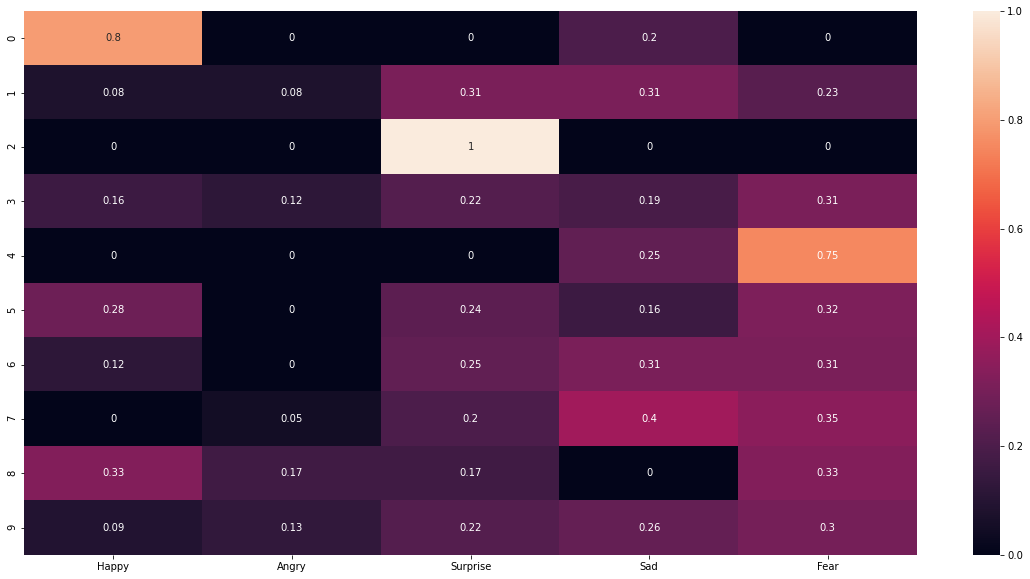

In [517]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data.iloc[:10,3:8], annot=True)

### Most appearing words in Positive, Negative & Neutral reviews:

In [518]:
positive_reviews = data[data['Sentiment_VADER']=='Positive']
negative_reviews = data[data['Sentiment_VADER']=='Negative']
neutral_reviews = data[data['Sentiment_VADER']=='Neutral']

In [519]:
positive_reviews

Review_content Sentiment  \
0       IT IS MORE THAN VALUE FOR MONEY HAPPY WITH T...  Positive   
1       Earlier I gave a positive review, but after ...  Positive   
2       Inalsa Air Fryer...this is awesome product ....  Positive   
5       My friend has this Inalsa air fryer since ov...  Positive   
6       Excellent way for cooking for veg and Non-ve...  Positive   
...                                                 ...       ...   
2830                                      thank you!!!!   Neutral   
2831                                              Great  Positive   
2832    Oil free or less cooking is always good for ...  Positive   
2834                Good Product, easy to use to clean.  Positive   
2835    Your browser does not support HTML5 video.\n...  Positive   

     Sentiment_VADER  Happy  Angry  Surprise   Sad  Fear              Name  
0           Positive   0.80   0.00      0.00  0.20  0.00       SonamGupta   
1           Positive   0.08   0.08      0.31  0.31  0.23      Sumit Saxena  
2           Positive   0.00   0.00      1.00  0.00  0.00      Ankit Mishra  
5           Positive   0.28   0.00      0.24  0.16  0.32       Mihir Patil  
6           Positive   0.12   0.00      0.25  0.31  0.31  Shashikant Yeole  
...              ...    ...    ...       ...   ...   ...               ...  
2830        Positive   0.00   0.00      0.00  0.00  0.00    Priyanka Singh  
2831        Positive   1.00   0.00      0.00  0.00  0.00       Mitu Biswas  
2832        Positive   0.25   0.00      0.00  0.50  0.25            Prince  
2834        Positive   1.00   0.00      0.00  0.00  0.00             B S R  
2835        Positive   0.50   0.00      0.50  0.00  0.00          Manmohan  

[2198 rows x 9 columns]

In [520]:
def text_cleanup(data):
    '''Returning a lemmatized word para and a DataFrame of words and their counts'''
    reviews = [x for x in data if x] # Removing empty fields
    text = ' '.join(reviews) # Making the list into para
    no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #removing punctuation
    text_tokens = word_tokenize(no_punc_text) # tokenizing
    
    # turning tokenzied words to lowercase
    text_tokens_lower = []
    for word in text_tokens:
        text_tokens_lower.append(word.lower())
        
    # Removing Stop words    
    no_stop_tokens = [word for word in text_tokens_lower if not word in stopwords]
    
    # Lemmatinzing the words
    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in no_stop_tokens]    
    
    # Making lematized string
    lemma_para = ' '.join(lemmas)
    
    # counting of lemmas
    words_counter = Counter(lemmas)

    sorted_list_desc = list(sorted(words_counter.items(),
                           key=lambda item: item[1],
                           reverse=True))
    
    max_words_df = pd.DataFrame(sorted_list_desc[:20],columns=["common_words", "count"])

    max_words_df
    
    return lemma_para , max_words_df

In [523]:
positive_lemma_para , positive_lemmas_counts_df = text_cleanup(positive_reviews["Review_content"])

In [524]:
most_common_words(positive_lemmas_counts_df, "Positive") 

### Positive Words Wordcloud:

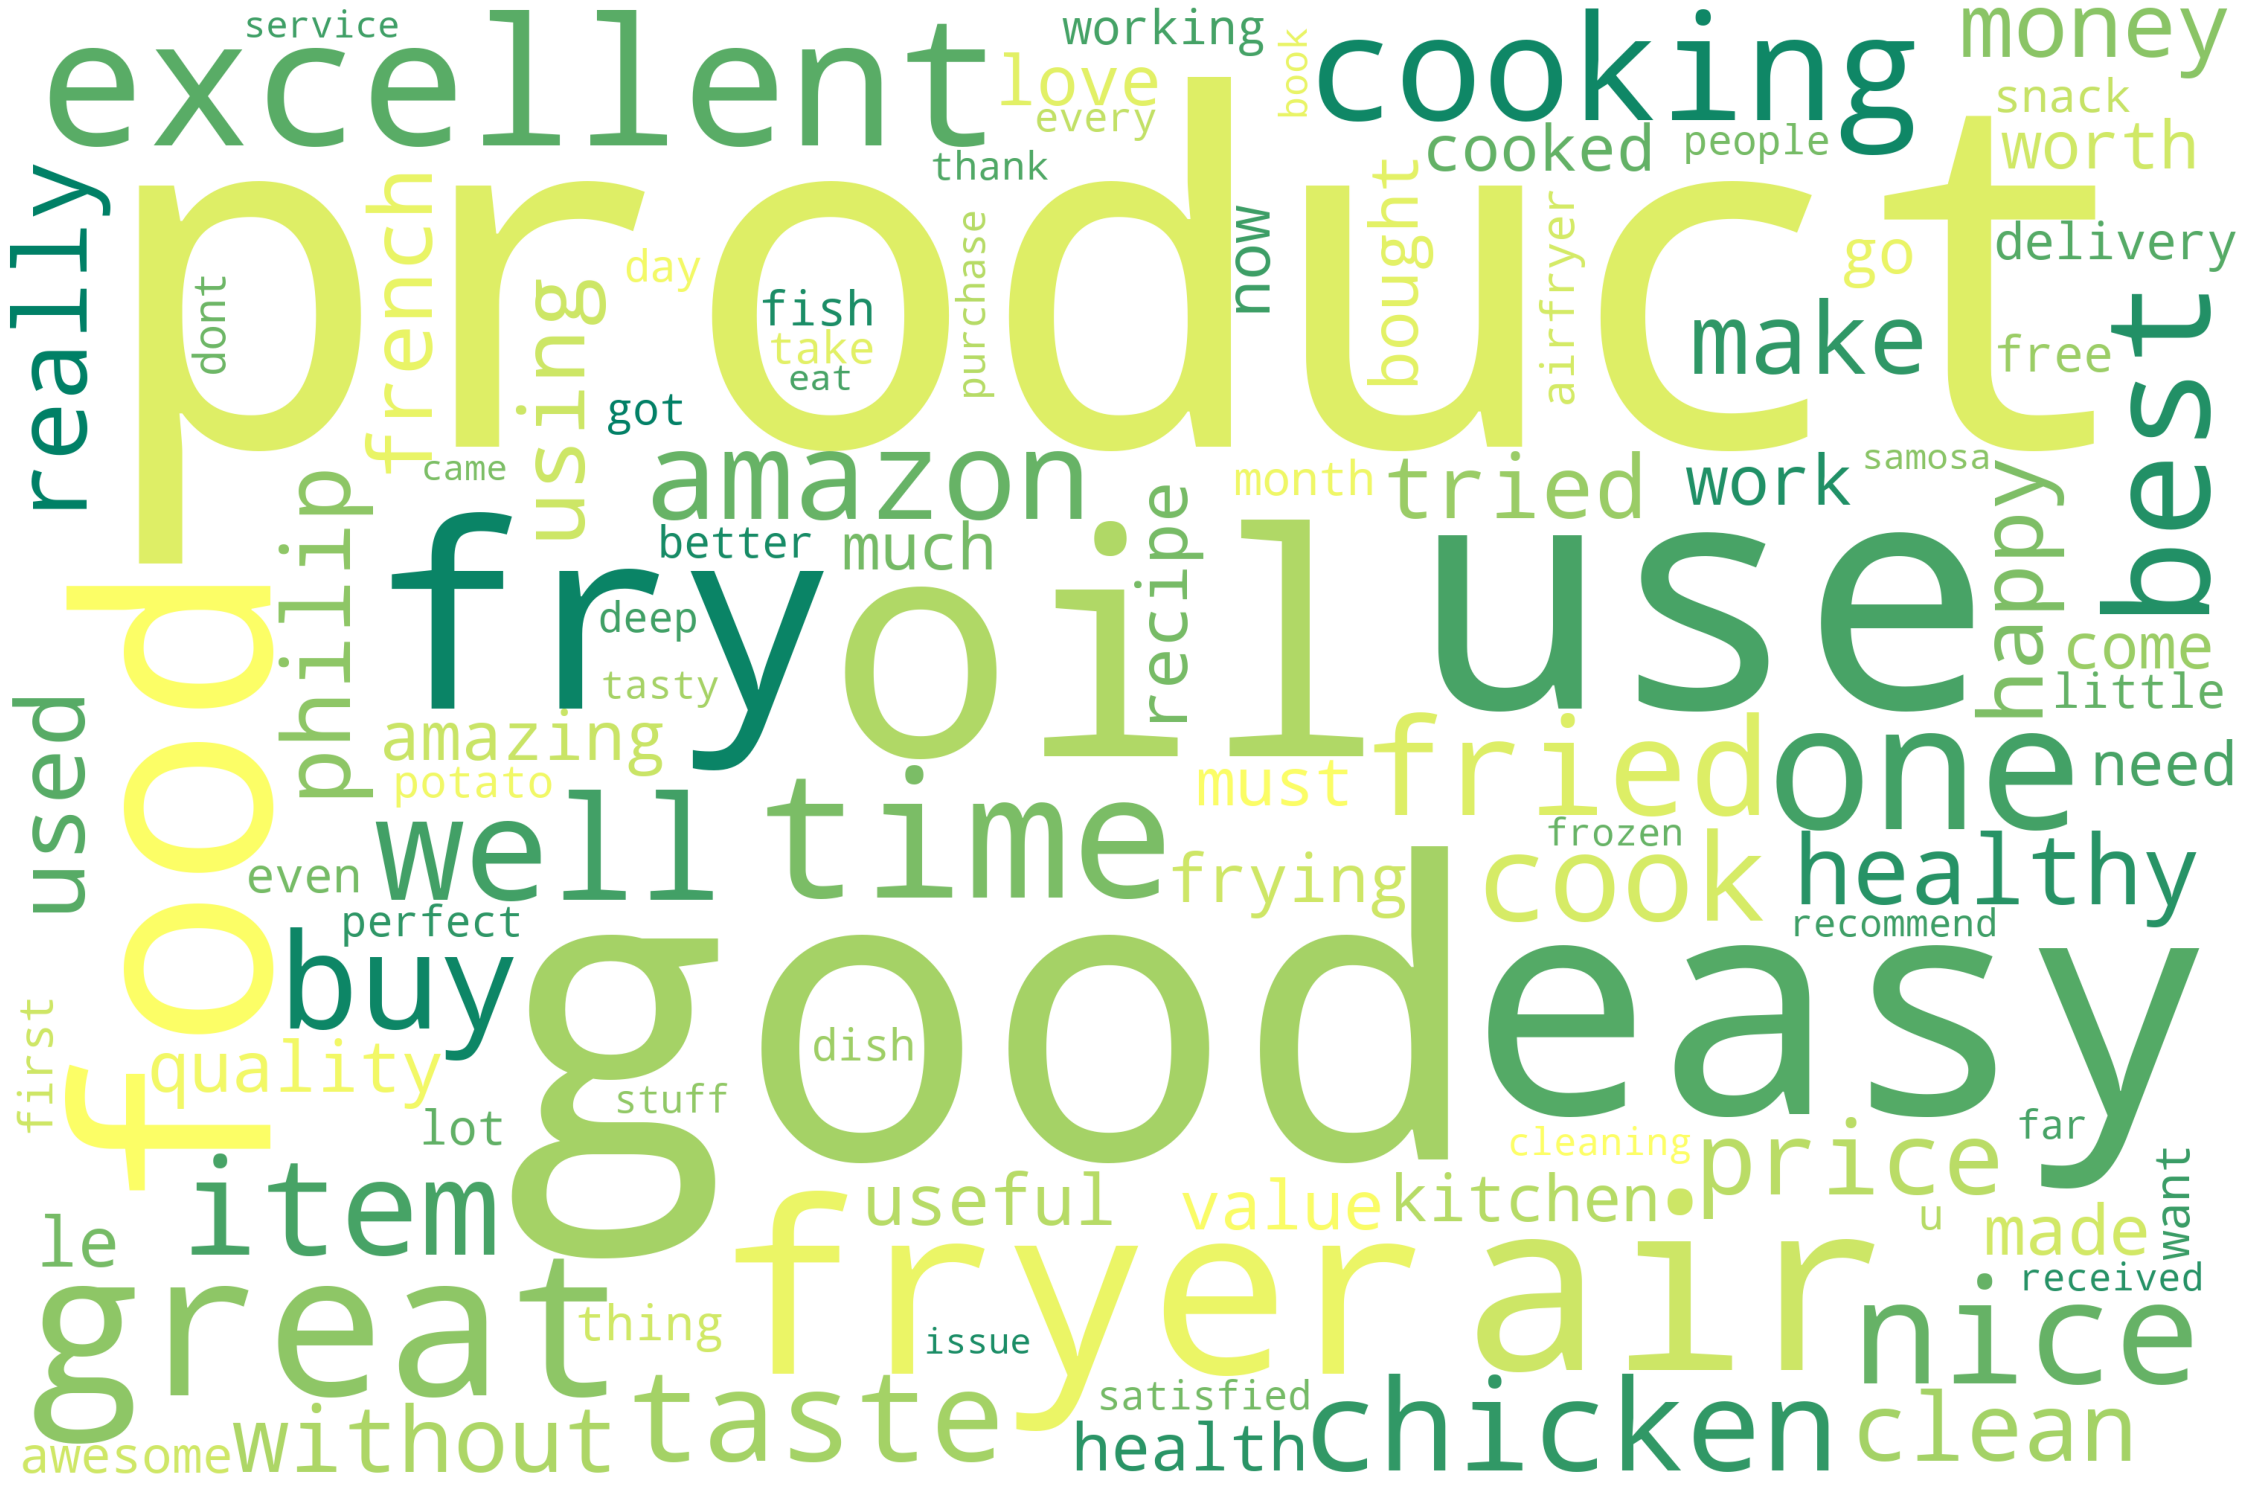

In [525]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='White', max_words=100,colormap='summer',stopwords=stopwords, collocations=False).generate(positive_lemma_para)
# Plot
plot_cloud(wordcloud)

In [526]:
negative_lemma_para , negative_lemmas_counts_df = text_cleanup(negative_reviews["Review_content"])

In [527]:
most_common_words(negative_lemmas_counts_df, "Negative")

### Negative Words Wordcloud:

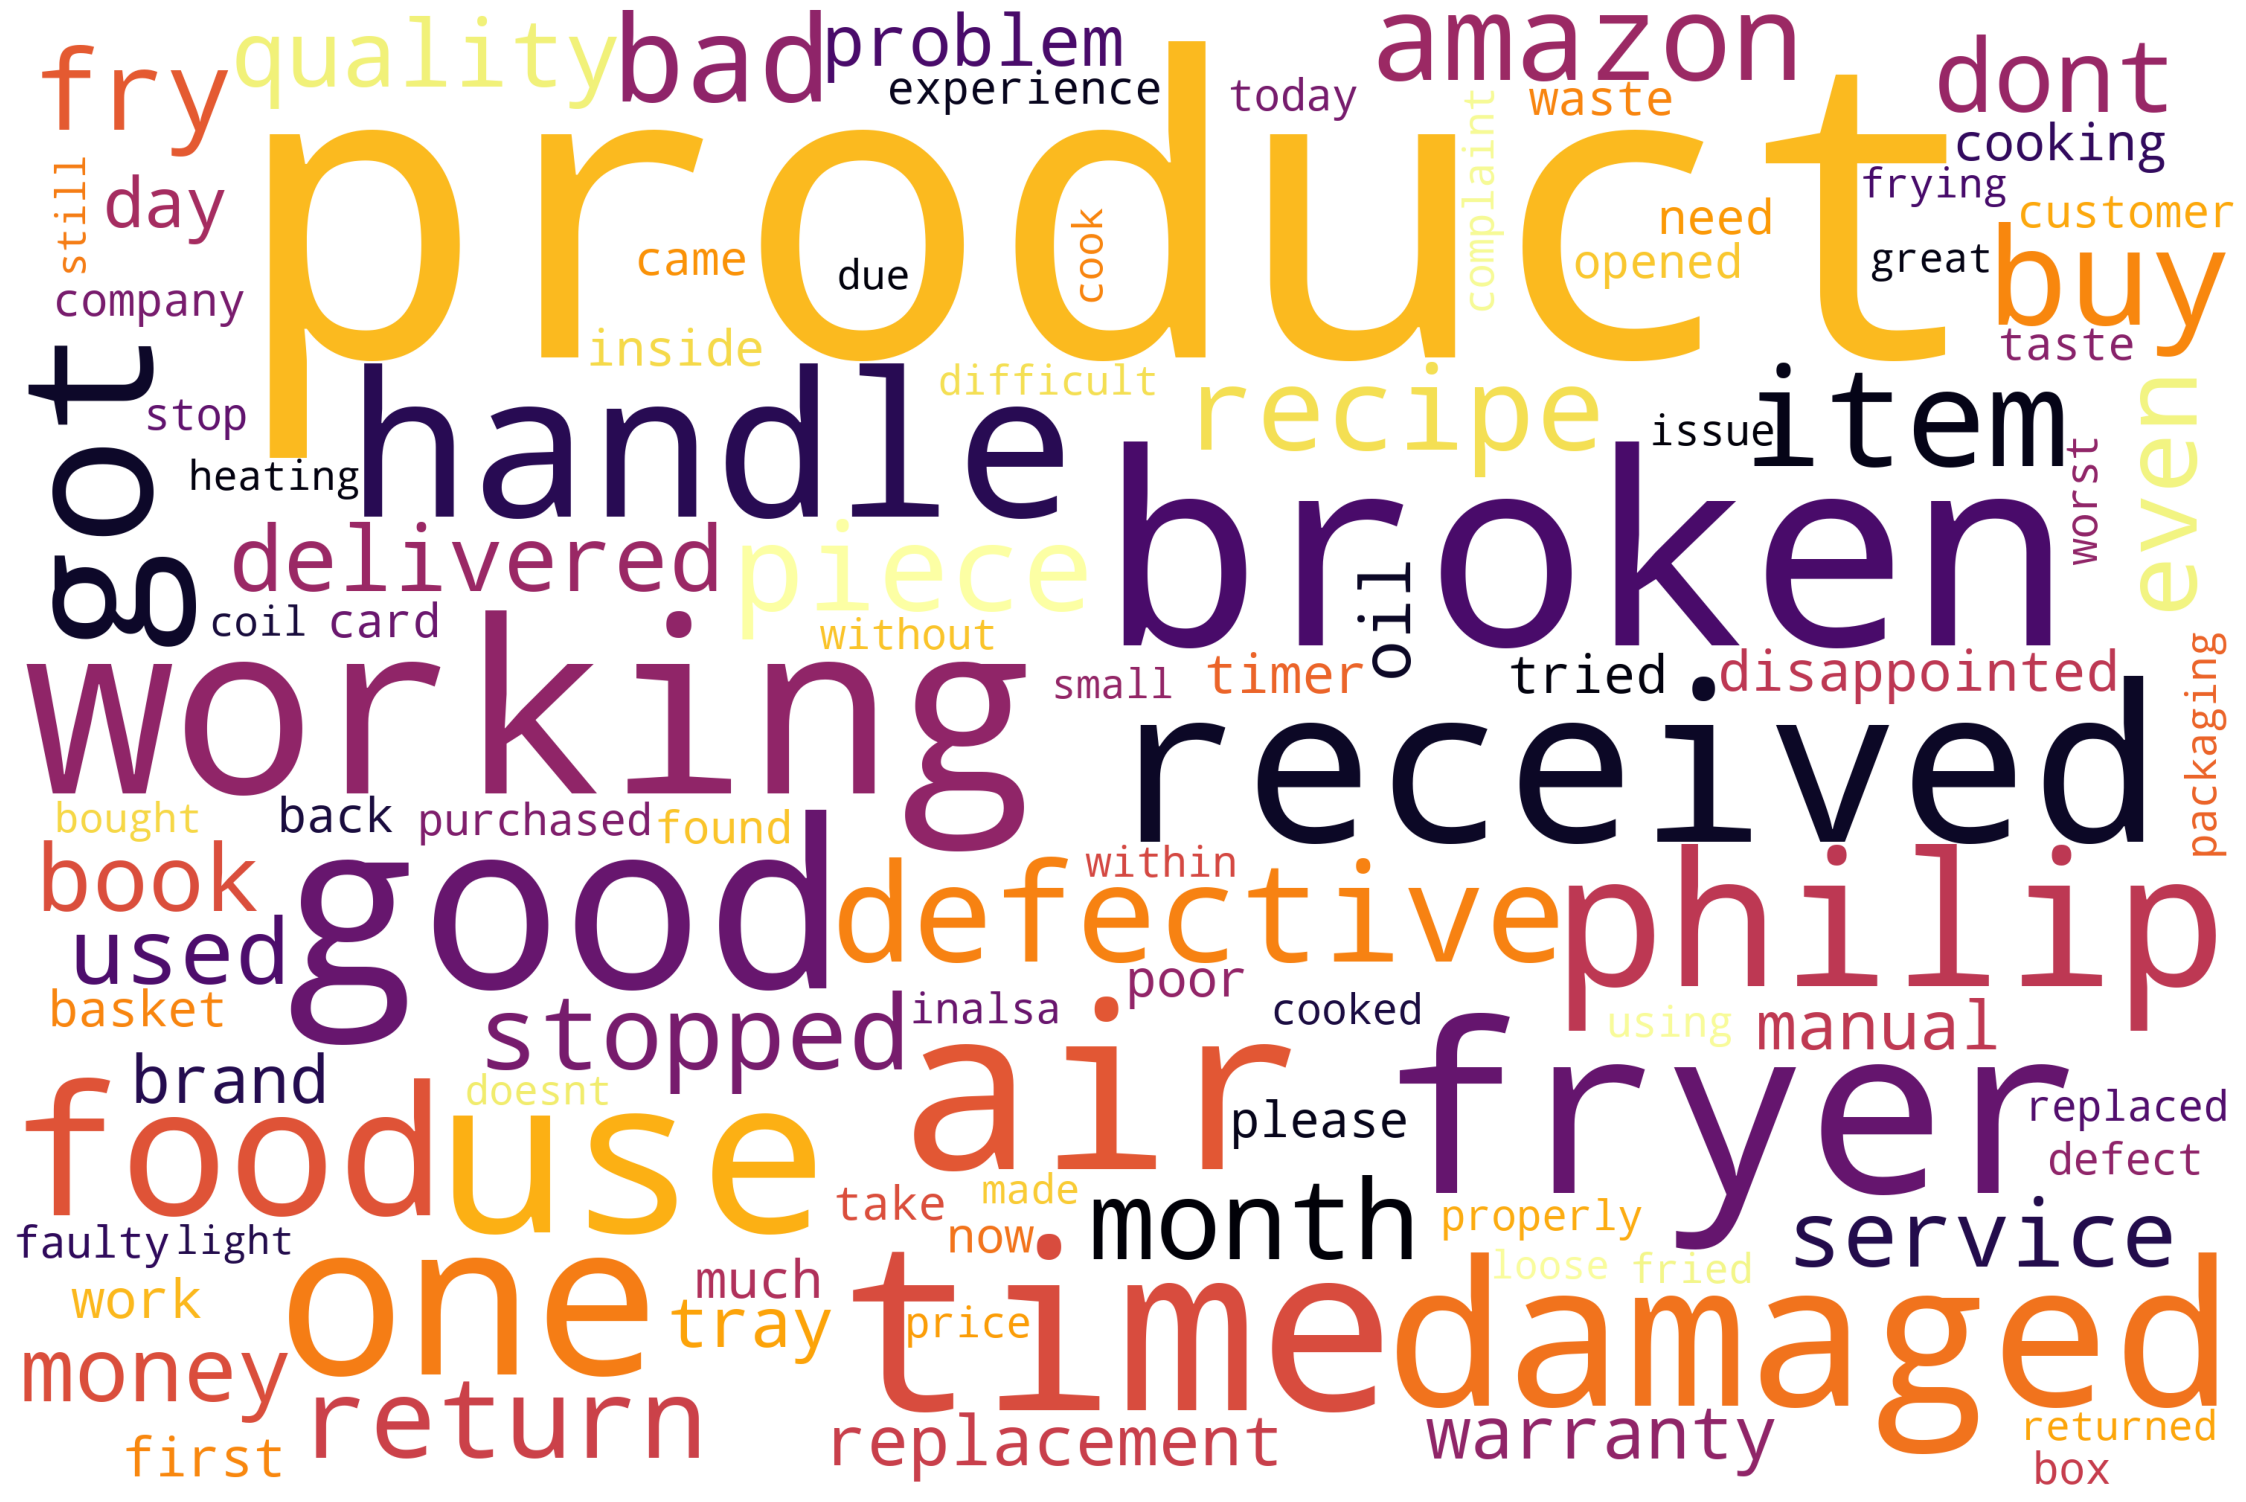

In [528]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color="White", max_words=100,colormap='inferno_r',stopwords=stopwords, collocations=False).generate(negative_lemma_para)
# Plot
plot_cloud(wordcloud)

In [529]:
neutral_lemma_para , neutral_lemmas_counts_df = text_cleanup(neutral_reviews["Review_content"])

In [530]:
most_common_words(neutral_lemmas_counts_df, "Neutral")

### Neutral Words Wordcloud:

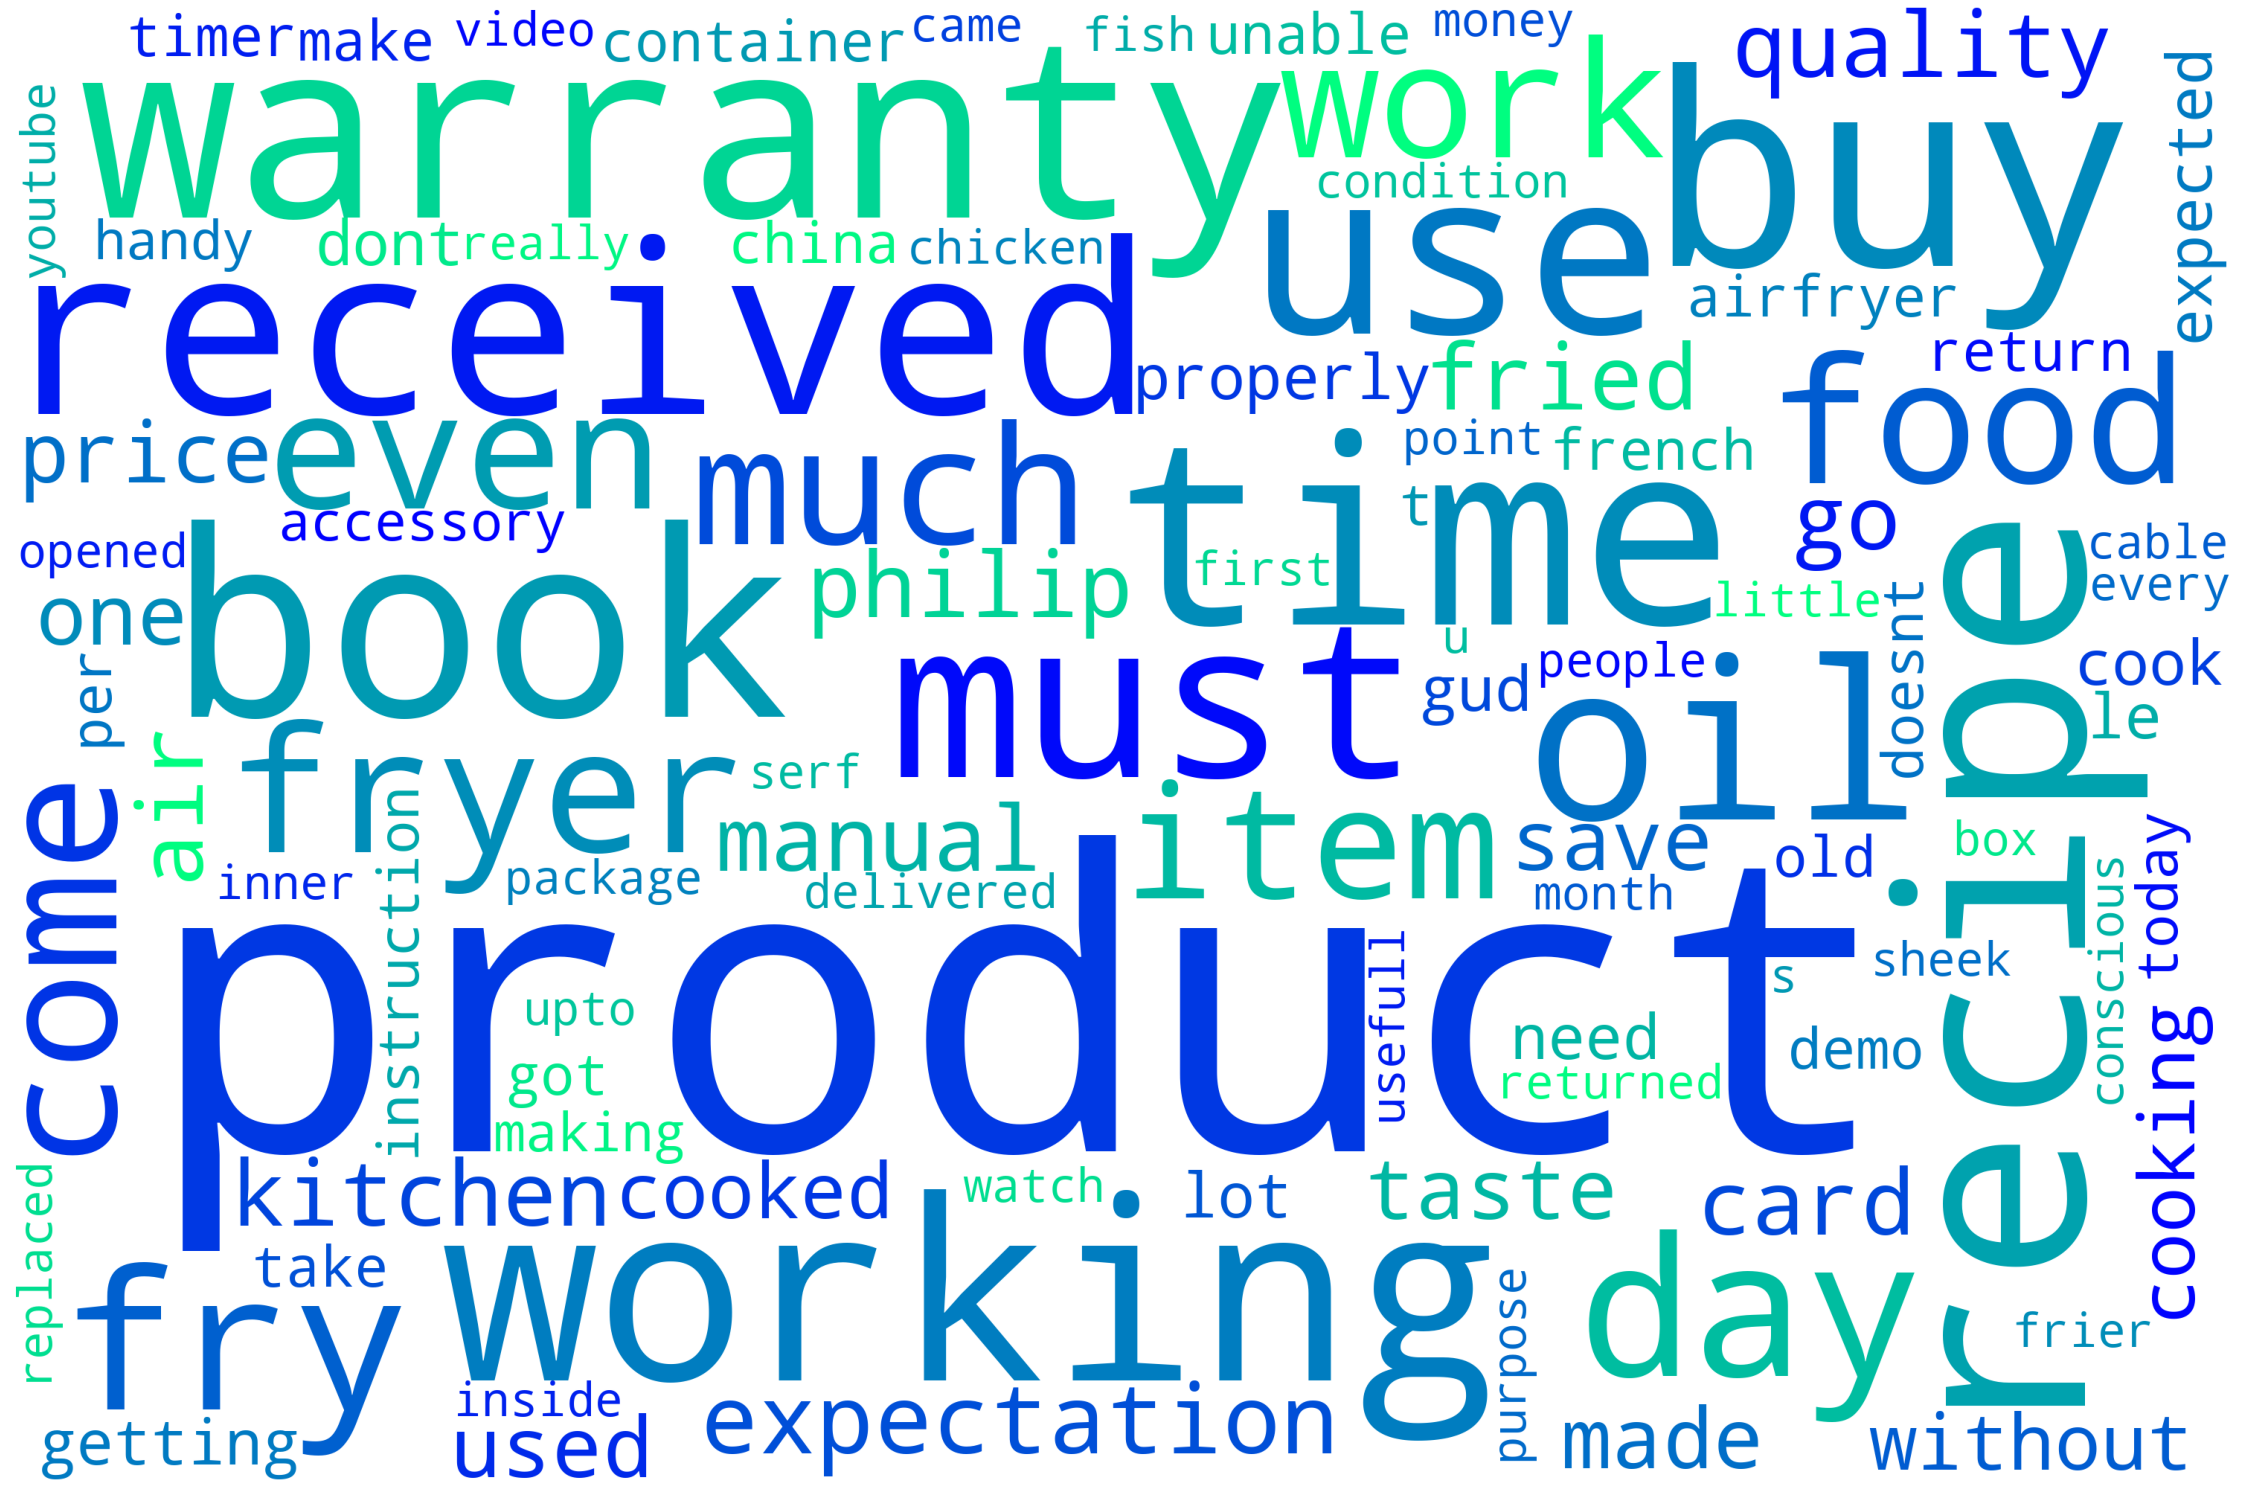

In [531]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color="White", max_words=100,colormap='winter',stopwords=stopwords, collocations=False).generate(neutral_lemma_para)
# Plot
plot_cloud(wordcloud)

###### Our client can now take decisions based on these reviews and words that are frequently occuring

###### He can use the emotion dataframe to check what makes the customer angry or happy